In [25]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2 as cv
import matplotlib.pyplot as plt

In [26]:
import wget
url = "https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task"
filename = wget.download(url)

In [27]:
filename

'hand_landmarker (4).task'

## Visualization utilities

In [28]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv.LINE_AA)

  return annotated_image

## Load test image

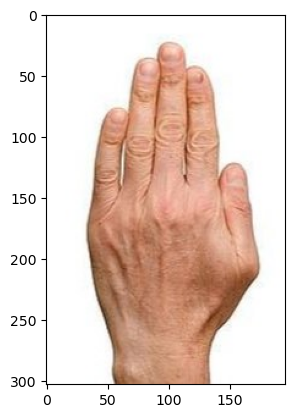

In [29]:
foto = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\papel.jpg")
img = cv.cvtColor(foto, cv.COLOR_BGR2RGB)
plt.imshow(img)

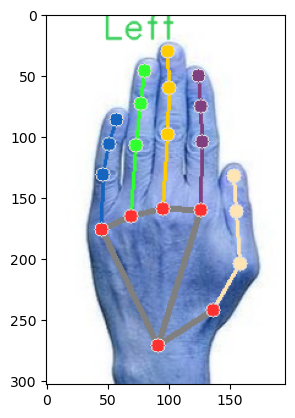

In [30]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\papel.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(cv.cvtColor(annotated_image, cv.COLOR_RGB2BGR))

In [31]:
import mediapipe as mp

path_modelo = "C:\\Users\\daniel.martinezcarre\\Desktop\\Clase\\modelos_descargados\\hand_landmarker.task"

BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
HandLandmarkerResult = mp.tasks.vision.HandLandmarkerResult
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a hand landmarker instance with the live stream mode:
def print_result(result: HandLandmarkerResult, output_image: mp.Image, timestamp_ms: int):
    print('hand landmarker result: {}'.format(result))

options = HandLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=path_modelo),
    running_mode=VisionRunningMode.VIDEO,
    num_hands=2)


In [32]:
import time
import math

# Definimos el índice de la cámara (0 para la cámara web predeterminada)
camara_indice = 0

# Capturamos la cámara
cap = cv.VideoCapture(camara_indice)

# Verificamos si la cámara se abrió correctamente
if not cap.isOpened():
    print("Error al abrir la cámara")
    exit()

with HandLandmarker.create_from_options(options) as landmarker:
    timestamp_inicial = time.time()
    # Bucle para leer y mostrar frames
    while True:

        # Leemos un frame
        ret, frame = cap.read()

        # Si no se pudo leer el frame, salimos del bucle
        if not ret:
            print("Error al leer el frame")
            break

        # Mostramos el frame en una ventana
        cv.imshow("Video en vivo", frame)


        # PREPARE DATA: Convert the frame received from OpenCV to a MediaPipe’s Image object.
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)


        frame_timestamp_ms = round((time.time() - timestamp_inicial) * 1000)
        print(frame_timestamp_ms)
        
        # RUN THE TASK: The hand landmarker must be created with the live stream mode.
        landmaker_detection = landmarker.detect_for_video(mp_image, frame_timestamp_ms)

        # STEP 5: Process the classification result. In this case, visualize it.
        annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), landmaker_detection)
        cv.imshow("Detección de manos",annotated_image)

        # Salimos del bucle si se presiona la tecla "q"
        if cv.waitKey(1) & 0xFF == ord("q"):
            break

    # Liberamos la cámara
    cap.release()

    # Cerramos todas las ventanas
    cv.destroyAllWindows()


63
113
145
180
219
253
287
316
350
380
422
450
484
516
552
585
619
665
700
738
766
800
835
868
919
970
1006
1038
1070
1103
1137
1171
1204
1235
1272
1305
1339
1372
1407
1440
1472
1505
1537
1571
1604
1636
1669
1702
1737
1770
1801
1834
1867
1902
1936
1970
2002
2036
2068
2106
2137
2170
2206
2240
2274
2306
2338
2370
2402
2439
2473
2505
2538
2571
2604
2640
2668
2701
2740
2773
2805
2869
2920
2969
3018
3071
3120
3172
3222
3270
3319
3372
3421
3471
3519
3573
3622
3672
3718
3757
3806
3855
3906
3955
4005
4053
4106
4155
4204
4253
4306
4356
4406
4453
4503
4541
4590
4639
4686
4736
4802
4855
4905
4954
5003
5055
5102
5142
5188
5241
5291
5341
5391
5437
5489
5537
5589
5638
5720
5760
5806
5854
5906
5956
6006
6055
6108
6157
6207
6256
6309
6357
6409
6459
6508
6560
6608
6657
6706
6756
6806
6843
6886
6926
6975
7024
7074
7122
7160
7210
7257
7307
7359
7408
7459
7507
7556
7607
7657
7709
7757
7794
7841
7890
7942
7993
8042
8090
8126
8175
8227
8276
8326
8376
8426
8475
8528
8576
8628
8674
8725
8761
8810
8861
8911
89